In [365]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [366]:
import os
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal

In [367]:
dir = '/Users/innocent/cernbox/HepSpec/fragData/'
Blabel ='Before reboot THP on'
Alabel ='After reboot THP on'
Clabel ='After reboot THP off'
#file = dir+'perfMonAMD1.log'
#amd = True
#file = dir+'perfMonORI.log'
#fileB = dir+'perfMonORI.log'
#fileA = dir+'perfMonFIXED.log'
fileC = dir+'perfMon_benchNoTHP.log'
fileB = dir+'perfMon_benchB.log'
fileA = dir+'perfMon_benchA.log'
#file = dir+'perfMonJE3.log'
#file = dir+'perfMonMultiA2.log'
#file = dir+'perfMonNoTHP2.log'
amd = False

In [368]:
columns = ['time','rawValue','unit','name','count','frac','metricValue','metric']
perfRawA =  pd.read_csv(fileA, delimiter=",",names=columns)
perfRawA['metric'] = perfRawA['metric'] +'_' + perfRawA['name']
perfRawB =  pd.read_csv(fileB, delimiter=",",names=columns)
perfRawB['metric'] = perfRawB['metric'] +'_' + perfRawB['name']
perfRawC =  pd.read_csv(fileC, delimiter=",",names=columns)
perfRawC['metric'] = perfRawC['metric'] +'_' + perfRawC['name']

In [369]:
clus=perfRaw
print(clus.index)
print(clus.columns)
print(clus.size)
print(clus.describe())
print(clus.head(25))
print(clus.tail())

RangeIndex(start=0, stop=3097, step=1)
Index(['time', 'rawValue', 'unit', 'name', 'count', 'frac', 'metricValue',
       'metric'],
      dtype='object')
24776
              time      rawValue         count         frac  metricValue
count  3097.000000  3.097000e+03  3.097000e+03  3097.000000  3097.000000
mean    820.618502  2.381216e+11  3.848286e+11    60.087485   165.046851
std     471.003452  4.604939e+11  1.963756e+11    30.663265   277.196378
min      10.012279  0.000000e+00  2.133825e+11    33.330000     0.000000
25%     410.294315  6.403126e+05  2.134906e+11    33.330000     0.061000
50%     820.596796  1.292794e+09  2.668551e+11    41.670000     2.300000
75%    1230.930458  2.385263e+11  6.404160e+11   100.000000   194.910000
max    1631.349761  1.984208e+12  6.405766e+11   100.000000  2407.243000
         time      rawValue  unit                                        name  \
0   10.012279  6.405766e+05  msec                                  task-clock   
1   10.012279  2.6831

In [370]:
rawA = perfRawA.pivot(index='time', columns='name', values='rawValue')
rawB = perfRawB.pivot(index='time', columns='name', values='rawValue')
rawC = perfRawC.pivot(index='time', columns='name', values='rawValue')
#raw = raw[raw['cycles']>250000000000.]

In [371]:
metricsA = perfRawA.pivot(index='time', columns='metric', values='metricValue')
metricsB = perfRawB.pivot(index='time', columns='metric', values='metricValue')
metricsC = perfRawC.pivot(index='time', columns='metric', values='metricValue')
#metrics = metrics[metrics['GHz_cycles']>0.59]
# xmax = 1600 #1850
xmax = 1750

In [372]:
def cycle(raw) : 
  fig, ax1 = plt.subplots(1, sharex=True,figsize=(10, 4))
  raw['cycles'].plot(ax=ax1)
  if amd :
     raw['stalled-cycles-backend'].plot(ax=ax1)
     raw['stalled-cycles-frontend'].plot(ax=ax1)
  else :
     raw['cycle_activity.stalls_total'].plot(ax=ax1)
     raw['cycle_activity.stalls_mem_any'].plot(ax=ax1)
  ax1.legend()
  ax1.grid()
  ax1.set_xlim(0.,xmax)
  plt.show()

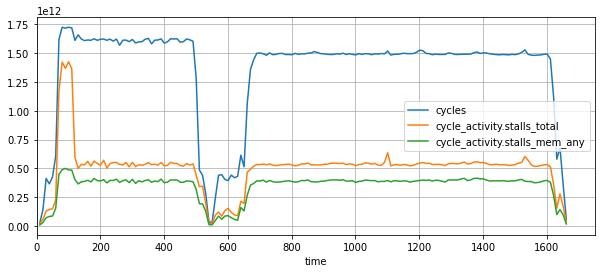

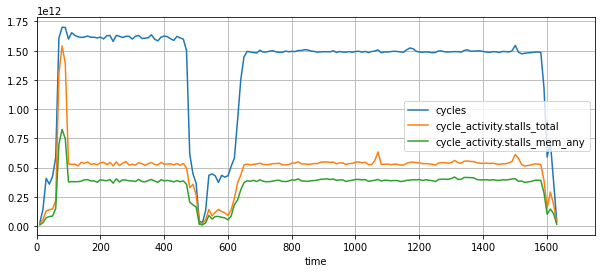

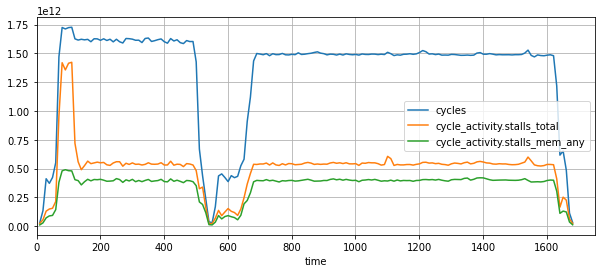

In [373]:
cycle(rawB)
cycle(rawA)
cycle(rawC)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


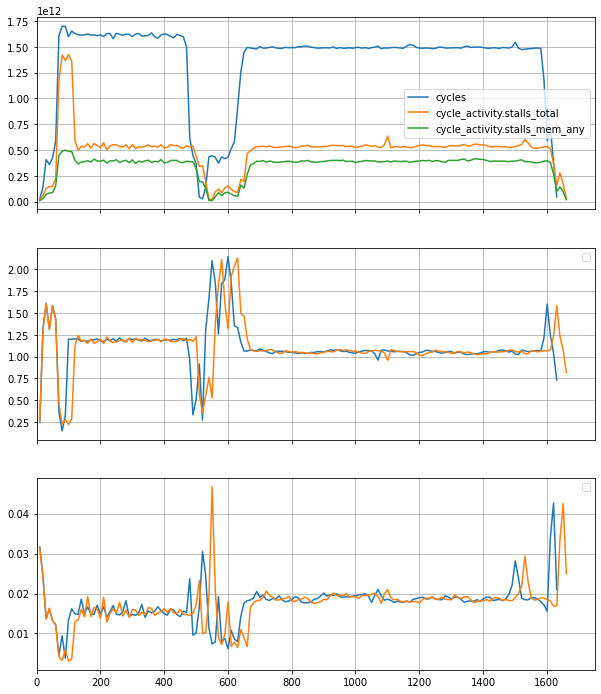

In [374]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True,figsize=(10, 12))
rawA['cycles'].plot(ax=ax1)
if amd :
 rawB['stalled-cycles-backend'].plot(ax=ax1)
 rawB['stalled-cycles-frontend'].plot(ax=ax1)
else :
 rawB['cycle_activity.stalls_total'].plot(ax=ax1)
 rawB['cycle_activity.stalls_mem_any'].plot(ax=ax1)
ax1.legend()
ax1.grid()
ax1.set_xlim(0.,xmax)
ax2.plot(rawA['instructions']/rawA['cycles'])
ax2.plot(rawB['instructions']/rawB['cycles'])
#metrics['insn per cycle_instructions'].plot(ax=ax2)
ax2.legend()
ax2.grid()
#metrics['GHz_cycles'].plot(ax=ax3)
ax3.plot(rawA['branch-misses']/rawA['branch-instructions'])
ax3.plot(rawB['branch-misses']/rawB['branch-instructions'])
ax3.legend()
ax3.grid()
plt.show()

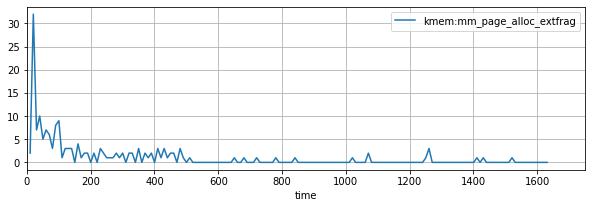

In [375]:
fig, axs = plt.subplots(figsize=(10, 3))
rawA['kmem:mm_page_alloc_extfrag'].plot()
axs.legend()
axs.set_xlim(0.,xmax)
plt.grid()
plt.show()

In [376]:
def kmem(raw) :
  fig, axs = plt.subplots(figsize=(10, 3))
  #raw['kmem:mm_page_alloc_extfrag'].plot()
  raw['kmem:mm_page_alloc'].plot()
  raw['kmem:mm_page_free'].plot()
  #raw['kmem:kmem_cache_alloc'].plot()
  #raw['kmem:kmem_cache_free'].plot()
  axs.legend()
  axs.set_xlim(0.,xmax)
  plt.grid()
  plt.show()


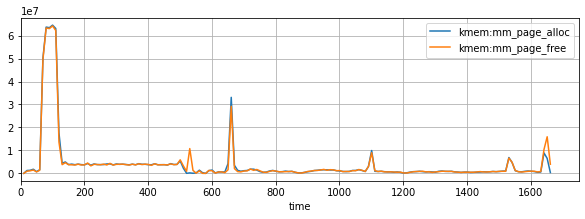

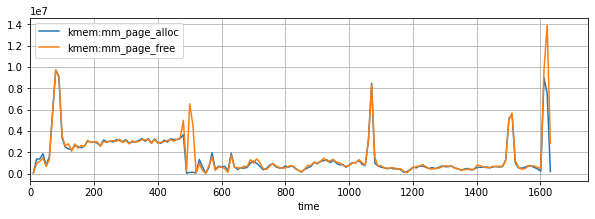

In [377]:
kmem(rawB)
kmem(rawA)
kmem(rawC)

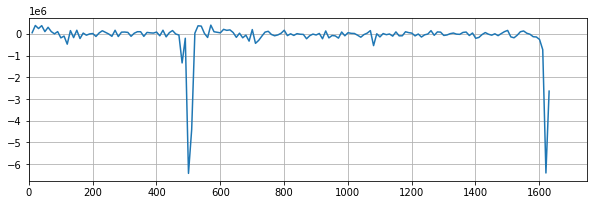

In [378]:
raw = rawA
fig, axs = plt.subplots(figsize=(10, 3))
axs.plot(raw['kmem:mm_page_alloc']-raw['kmem:mm_page_free'])
axs.set_xlim(0.,xmax)
#axs.legend()
plt.grid()
plt.show()

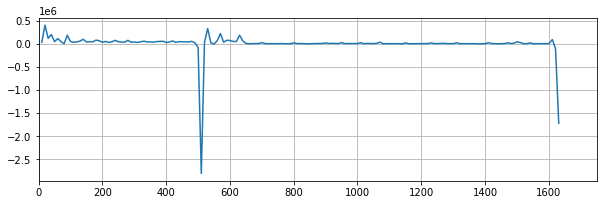

In [379]:
fig, axs = plt.subplots(figsize=(10, 3))
axs.plot(raw['kmem:kmem_cache_alloc']-raw['kmem:kmem_cache_free'])
axs.set_xlim(0.,xmax)
#axs.legend()
plt.grid()
plt.show()

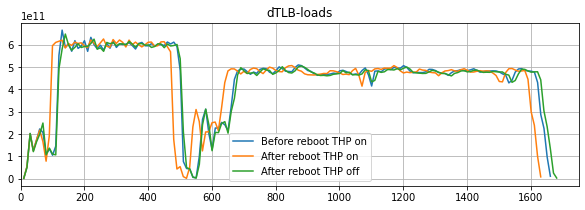

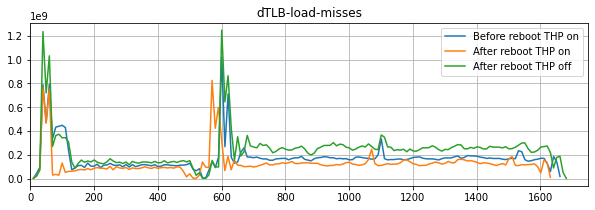

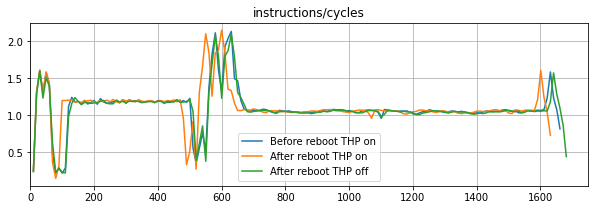

In [383]:
fig, ax1 = plt.subplots(1, sharex=True,figsize=(10, 3))
ax1.plot(rawB['dTLB-loads'] ,label=Blabel)
ax1.plot(rawA['dTLB-loads'] ,label=Alabel)
ax1.plot(rawC['dTLB-loads'] ,label=Clabel)
ax1.set_xlim(0.,xmax)
plt.title('dTLB-loads')
ax1.legend()
ax1.grid()
plt.show()
fig, ax1 = plt.subplots(1, sharex=True,figsize=(10, 3))
ax1.plot(rawB['dTLB-load-misses'] ,label=Blabel)
ax1.plot(rawA['dTLB-load-misses'] ,label=Alabel)
ax1.plot(rawC['dTLB-load-misses'] ,label=Clabel)
ax1.set_xlim(0.,xmax)
plt.title('dTLB-load-misses')
ax1.legend()
ax1.grid()
plt.show()
fig, ax1 = plt.subplots(1, sharex=True,figsize=(10, 3))
ax1.plot(rawB['instructions']/rawB['cycles'],label=Blabel)
ax1.plot(rawA['instructions']/rawA['cycles'],label=Alabel)
ax1.plot(rawC['instructions']/rawC['cycles'],label=Clabel)
ax1.set_xlim(0.,xmax)
plt.title('instructions/cycles')
ax1.legend()
ax1.grid()
plt.show()


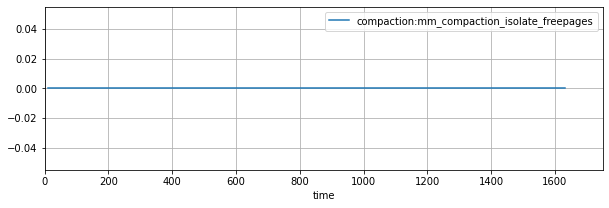

In [381]:
raw=rawA
if amd: 
    fig, axs = plt.subplots(figsize=(10, 3))
    raw['compaction:mm_compaction_try_to_compact_pages'].plot()
    raw['huge_memory:mm_collapse_huge_page'].plot()
    axs.set_xlim(0.,xmax)
    axs.legend()
    #plt.yscale("log")
    plt.grid()
    plt.show()
fig, axs = plt.subplots(figsize=(10, 3))
raw['compaction:mm_compaction_isolate_freepages'].plot()
axs.set_xlim(0.,xmax)
axs.legend()
#plt.yscale("log")
plt.grid()
plt.show()
